In [1]:
import numpy as np 
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from IPython.display import clear_output, display

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
#Load MNIST data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

print("Image Data Shape" , X.shape)
print("Label Data Shape", y.shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


In [3]:
#Split dataset into train and test set (80/20)
train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=0.2, random_state=0)

print('Train set: %i' % len(train_img))
print('Test set : %i' % len(test_img))

Train set: 56000
Test set : 14000


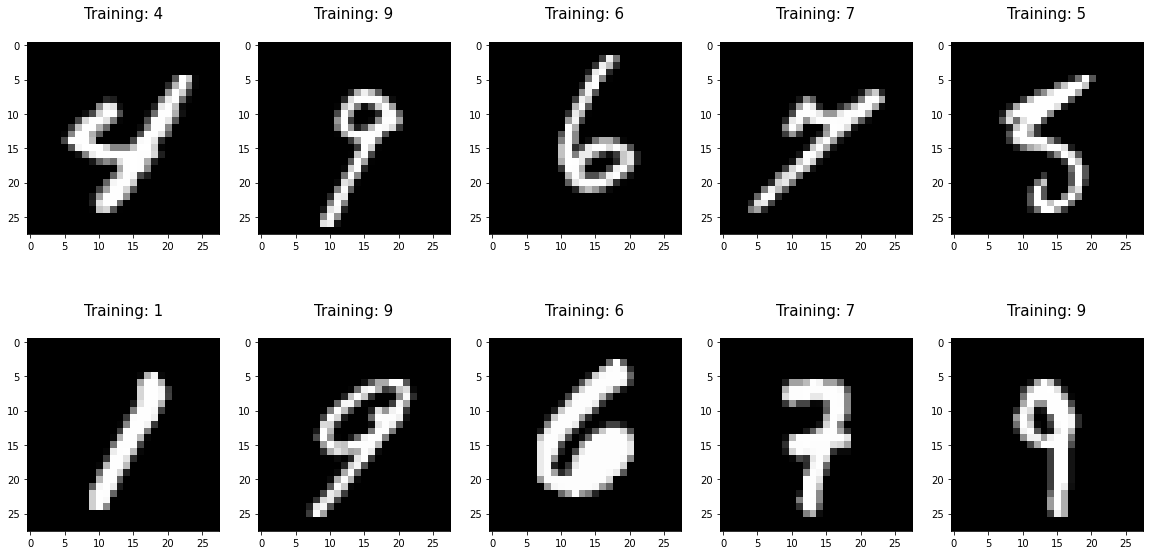

In [4]:
#Plot examples
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(train_img[0:10], train_lbl[0:10])):
     plt.subplot(2, 5, index + 1)
     plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
     plt.title('Training: {}\n'.format(label), fontsize = 15)

In [5]:
# Prepare the logistic regressor
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(C=50. / train_img.shape[0],
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)

# Fit model to training set (take some time)
t0 = time.time()
logisticRegr.fit(train_img, train_lbl)
t1 = time.time()
print("Logistic regression converge after {} sec.".format(t1-t0))

Logistic regression converge after 20.573015213012695 sec.


In [6]:
#Make predictions: return array of labels
print(logisticRegr.predict(test_img[:10]))

# make prediction for all image in the test set
predictions = logisticRegr.predict(test_img)

['0' '4' '1' '2' '7' '4' '7' '1' '1' '7']


In [7]:
# Use score method to get accuracy of model
score = logisticRegr.score(test_img, test_lbl)
print("Score on MNIST dataset: {}".format(score))

Score on MNIST dataset: 0.9141428571428571


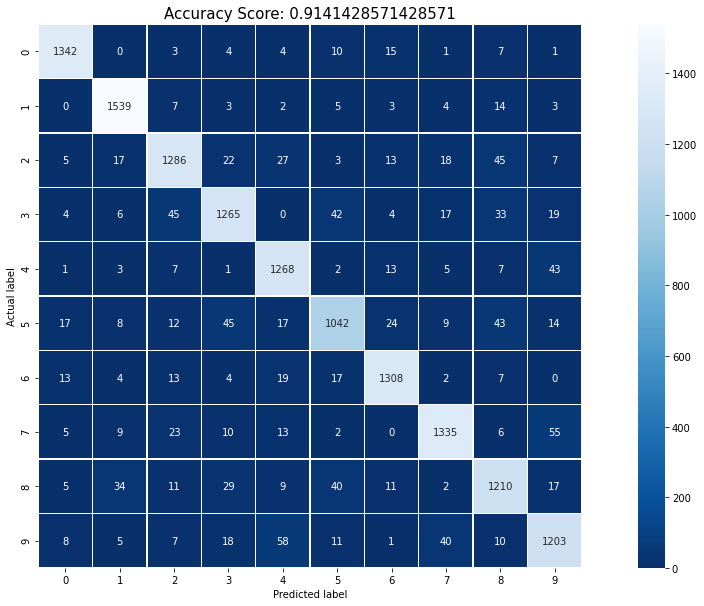

In [8]:
# Get the confusion matrix

cm = metrics.confusion_matrix(test_lbl, predictions)

plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

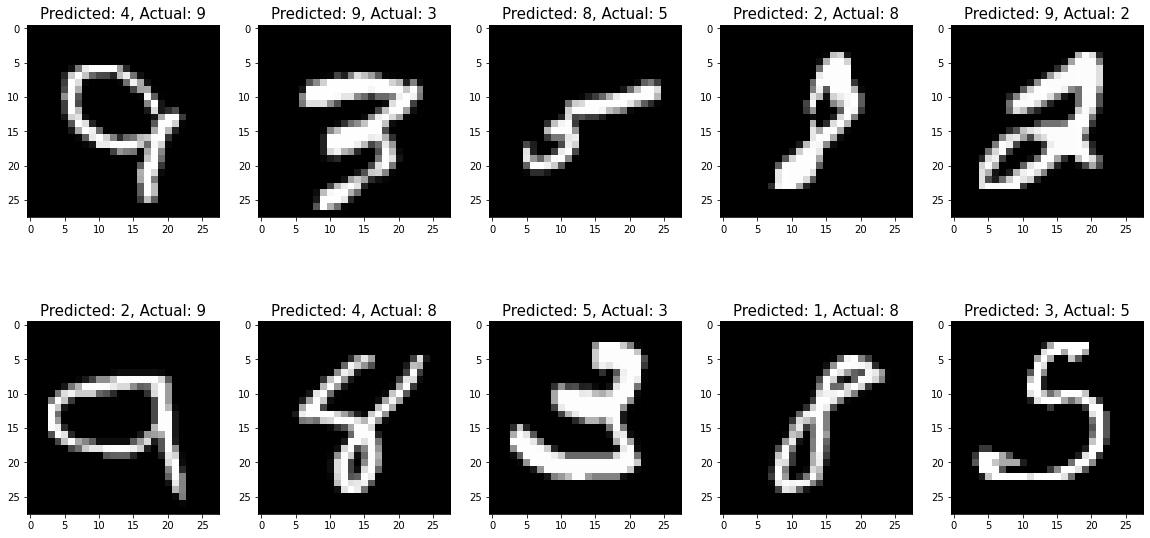

In [9]:
# PLot some misclassified digits
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
        
plt.figure(figsize=(20,10))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:10]):
    plt.subplot(2, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

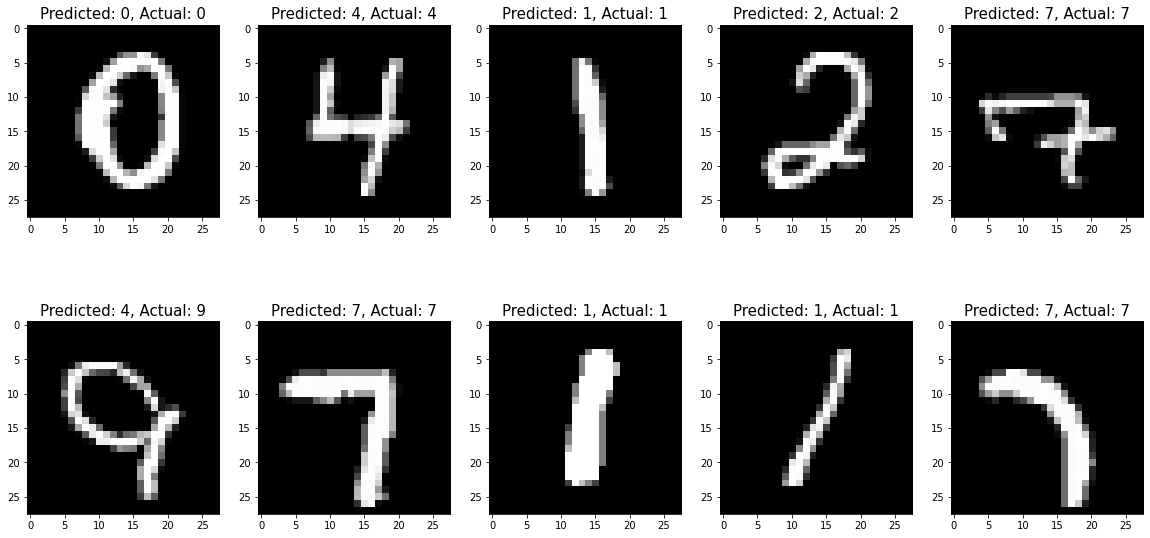

In [10]:
# PLot some digits
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    misclassifiedIndexes.append(index)
    index +=1
        
plt.figure(figsize=(20,10))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:10]):
    plt.subplot(2, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)